In [199]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
 

In [200]:
df = pd.read_csv('.\Documents\machine learning\Salary Dataset.csv')
df.head()


,Company Name,Job Title,Salaries Reported,Location,Salary
0,Mu Sigma,Data Scientist,105.0,Bangalore,"₹6,48,573/yr"
1,IBM,Data Scientist,95.0,Bangalore,"₹11,91,950/yr"
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,"₹8,36,874/yr"
3,Impact Analytics,Data Scientist,40.0,Bangalore,"₹6,69,578/yr"
4,Accenture,Data Scientist,32.0,Bangalore,"₹9,44,110/yr"


In [201]:
df.shape

(4344, 5)

In [202]:
df.columns

Index(['Company Name', 'Job Title', 'Salaries Reported', 'Location', 'Salary'], dtype='object')

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4344 entries, 0 to 4343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company Name       4341 non-null   object 
 1   Job Title          4344 non-null   object 
 2   Salaries Reported  4342 non-null   float64
 3   Location           4344 non-null   object 
 4   Salary             4344 non-null   object 
dtypes: float64(1), object(4)
memory usage: 169.8+ KB


In [204]:
df.describe()

,Salaries Reported
count,4342.000000
mean,2.775910
std,5.146527
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,105.000000


In [205]:
df.dtypes

Company Name          object
Job Title             object
Salaries Reported    float64
Location              object
Salary                object
dtype: object

In [206]:
df.duplicated().sum()


0

In [207]:
df["Job Title"].unique()


array(['Data Scientist', 'Data Science Associate',
       'Data Science Consultant', 'Data Science', 'Senior Data Scientist',
       'Junior Data Scientist', 'Lead Data Scientist',
       'Data Science Manager', 'Data Scientist - Trainee',
       'Data Science Lead', 'Data Analyst', 'Data Engineer',
       'Machine Learning Engineer', 'Machine Learning Software Engineer',
       'Software Engineer - Machine Learning',
       'Machine Learning Engineer/Data Scientist',
       'Machine Learning Consultant', 'Machine Learning Data Associate',
       'Machine Learning Data Associate I', 'Machine Learning Associate',
       'Machine Learning Data Associate II',
       'Associate Machine Learning Engineer',
       'Machine Learning Data Analyst',
       'Senior Machine Learning Engineer', 'Machine Learning Scientist',
       'Machine Learning Developer'], dtype=object)

In [208]:
df["Company Name"].nunique()


2529

In [209]:
df["Company Name"]


0                        Mu Sigma
1                             IBM
2       Tata Consultancy Services
3                Impact Analytics
4                       Accenture
                  ...            
4339                      TaiyōAI
4340      Decimal Point Analytics
4341                       MyWays
4342    Market Pulse Technologies
4343                      vPhrase
Name: Company Name, Length: 4344, dtype: object

In [210]:
df["Location"].unique()


array(['Bangalore', 'Pune', 'Hyderabad', 'New Delhi', 'Mumbai'],
      dtype=object)

In [211]:
df["Salary"].unique()


array(['₹6,48,573/yr', '₹11,91,950/yr', '₹8,36,874/yr', ...,
       '₹7,51,286/yr', '₹4,10,952/yr', '₹9,39,843/yr'], dtype=object)

In [212]:
df.isnull().sum()


Company Name         3
Job Title            0
Salaries Reported    2
Location             0
Salary               0
dtype: int64

In [213]:
#fill in the missing value of Salaries Reported column by computing the median
df['Salaries Reported'].fillna(df['Salaries Reported'].median(), inplace = True)

df.isnull().sum()

Company Name         3
Job Title            0
Salaries Reported    0
Location             0
Salary               0
dtype: int64

In [214]:
df = df[df['Company Name'].notna()]
df.isnull().sum()

Company Name         0
Job Title            0
Salaries Reported    0
Location             0
Salary               0
dtype: int64

In [215]:
df["Location"].value_counts()


Location
Bangalore    1584
Pune          815
Hyderabad     669
New Delhi     656
Mumbai        617
Name: count, dtype: int64

In [216]:
df["Job Title"].value_counts()


Job Title
Data Scientist                          1844
Data Analyst                             989
Data Engineer                            804
Machine Learning Engineer                568
Data Science                              43
Senior Data Scientist                     39
Junior Data Scientist                     18
Senior Machine Learning Engineer           9
Lead Data Scientist                        6
Machine Learning Scientist                 2
Machine Learning Data Associate II         2
Machine Learning Consultant                2
Software Engineer - Machine Learning       2
Machine Learning Developer                 2
Machine Learning Software Engineer         1
Data Science Associate                     1
Data Science Consultant                    1
Machine Learning Data Associate            1
Machine Learning Data Associate I          1
Machine Learning Associate                 1
Data Science Lead                          1
Associate Machine Learning Engineer        1


In [217]:
df["Salaries Reported"].value_counts()


Salaries Reported
1.0      2503
2.0       735
3.0       382
4.0       180
5.0       124
6.0        76
7.0        66
8.0        42
9.0        35
10.0       27
11.0       23
15.0       17
14.0       14
12.0       10
13.0        9
17.0        8
18.0        8
16.0        8
20.0        6
22.0        6
19.0        5
23.0        5
21.0        4
26.0        4
28.0        4
32.0        4
40.0        4
31.0        3
27.0        3
24.0        3
25.0        3
30.0        2
35.0        2
38.0        1
46.0        1
36.0        1
49.0        1
86.0        1
29.0        1
33.0        1
105.0       1
41.0        1
44.0        1
45.0        1
48.0        1
62.0        1
95.0        1
66.0        1
81.0        1
Name: count, dtype: int64

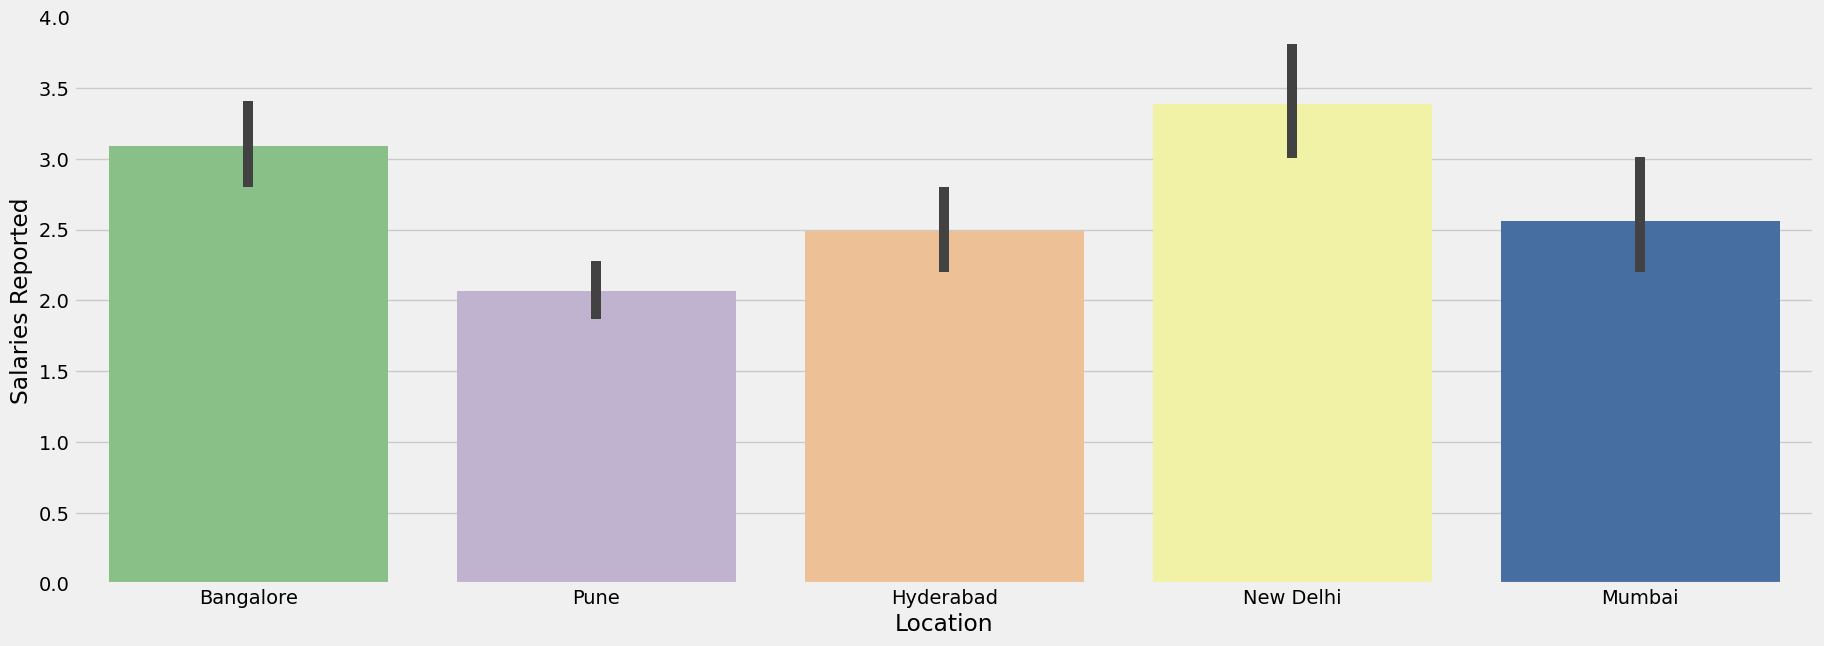

In [218]:
#Comparing location vS  salaries reported using a barplot

plt.figure(figsize = (20, 7))
sns.barplot(x = df["Location"], y = df["Salaries Reported"], palette = "Accent");


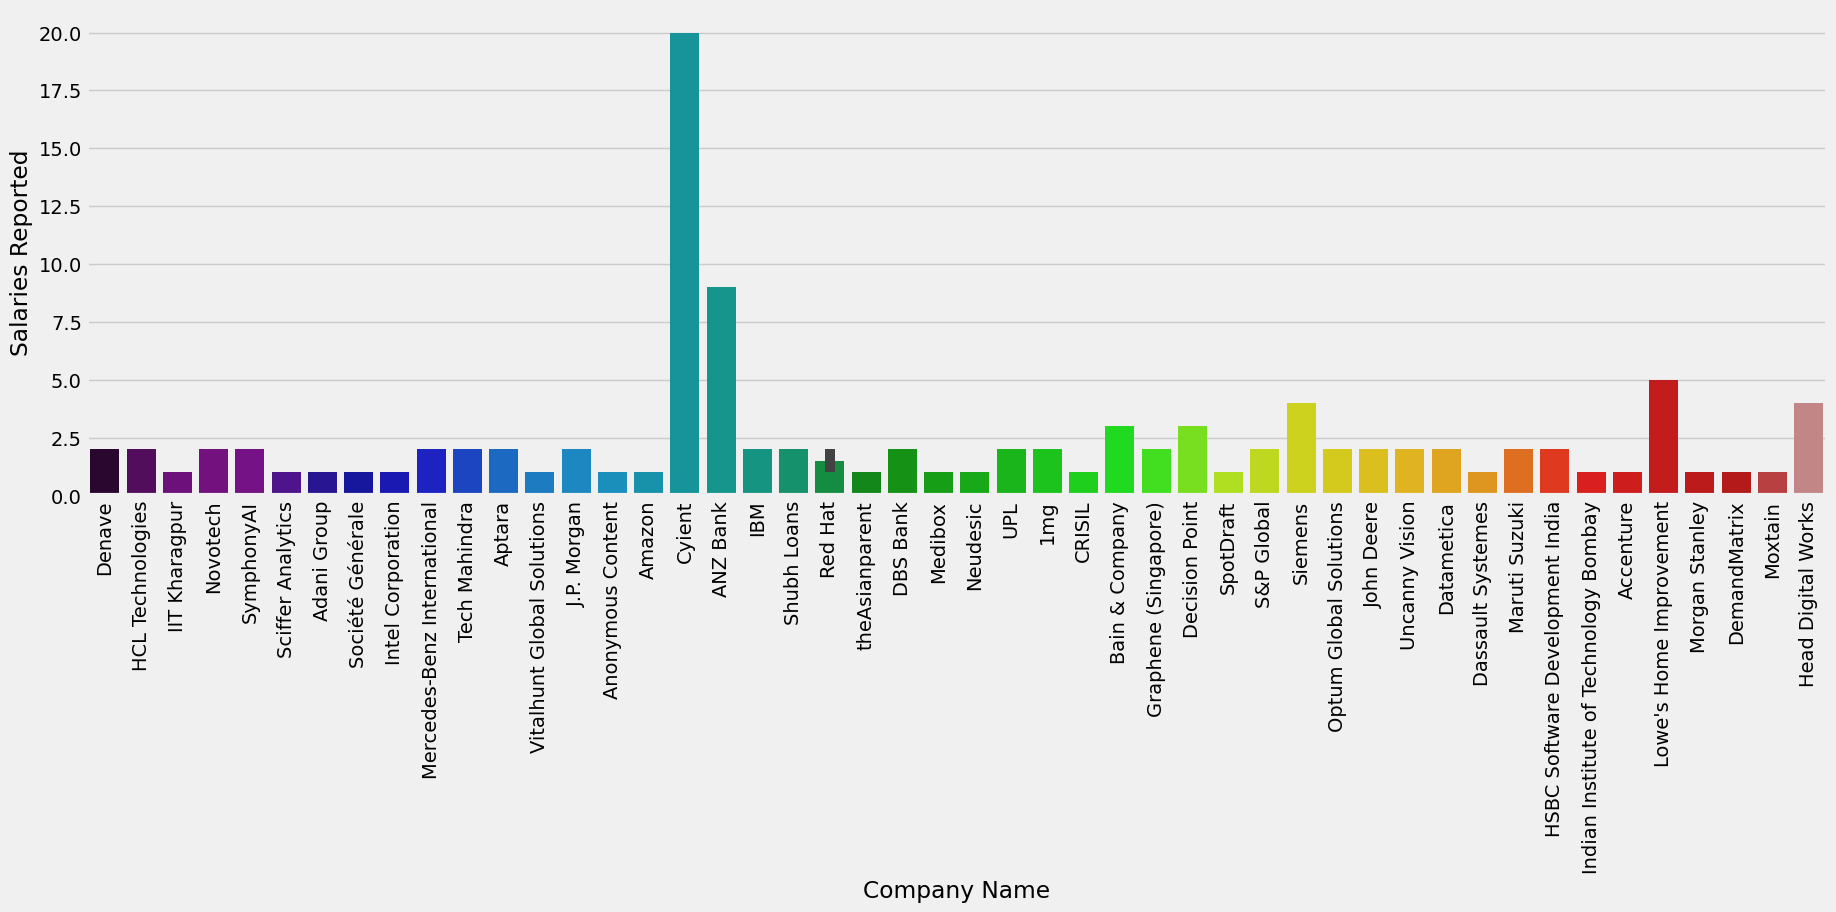

In [219]:
#Comparing Company Name vS  salaries reported using a barplot
plt.figure(figsize = (20, 6))
plt.xticks(rotation = 90)
plt.ticklabel_format(style = 'plain')
df.sort_values("Salary", axis = 0, ascending = False, inplace = True)
sns.barplot(x = df["Company Name"][:50], y = df["Salaries Reported"][:50], palette = "nipy_spectral");

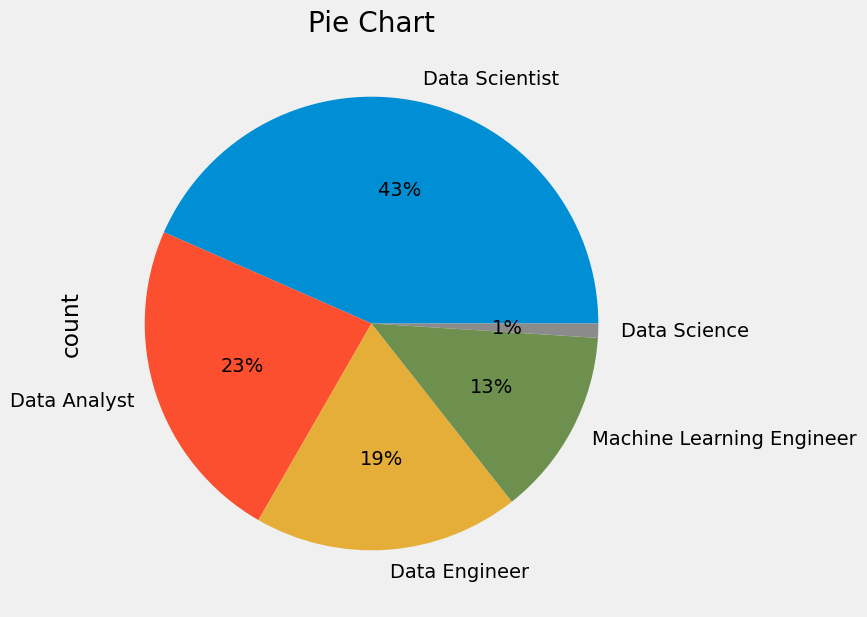

In [220]:
#pie chart predsentation ofthejob titles
df["Job Title"].value_counts()[:5].plot.pie(figsize = (7, 7), autopct = '%1.0f%%')
plt.title("Pie Chart")
plt.xticks(rotation = 45)
plt.show()
#data scientist  is the highest job title while data science is the least

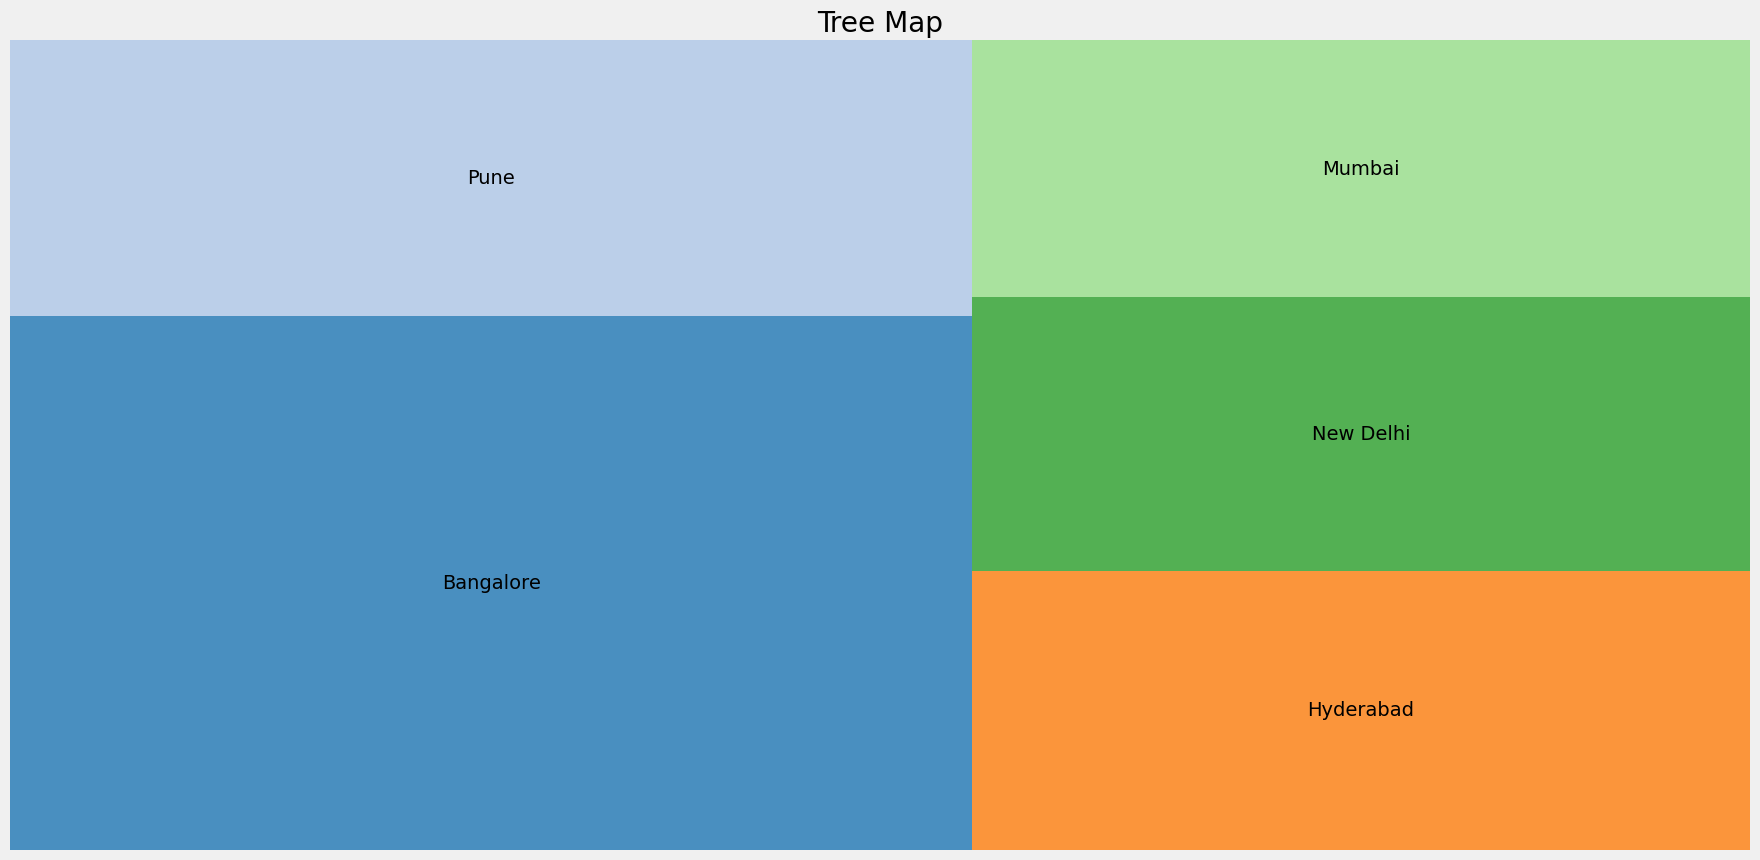

In [221]:
import pandas as pd
import numpy as np
import seaborn as sns
import squarify
df = pd.read_csv('.\Documents\machine learning\Salary Dataset.csv')
y = df["Location"].value_counts()[:10]
plt.rcParams["figure.figsize"] = (20, 10)
plt.style.use("fivethirtyeight")
color = plt.cm.tab20(np.linspace(0, 1, 15))
squarify.plot(sizes = y.values, label = y.index, alpha = 0.8, color = color)
plt.title("Tree Map")
plt.axis("off")
plt.show() 
#The visualization of the location using a tree map, where bangalore has the majority


In [222]:
df.dtypes

Company Name          object
Job Title             object
Salaries Reported    float64
Location              object
Salary                object
dtype: object

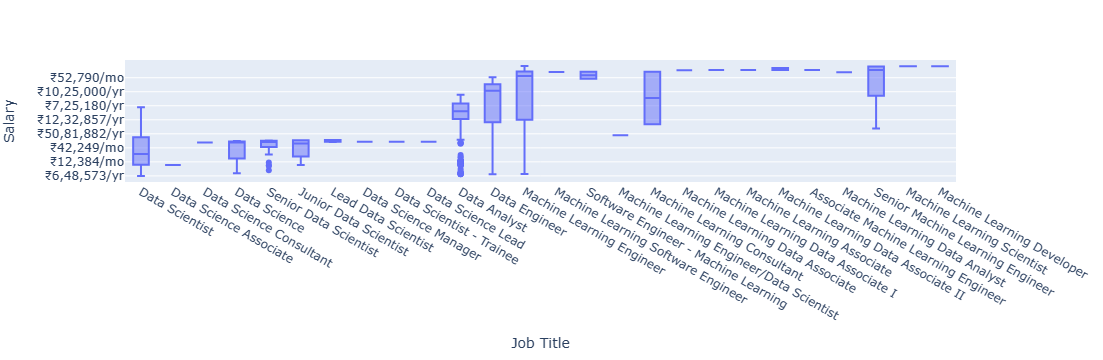

In [223]:
import plotly.express as px
df = pd.read_csv('.\Documents\machine learning\Salary Dataset.csv')
fig = px.box(df,y="Salary", x="Job Title")

fig.show()

In [224]:

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each column
df['Company Name'] = label_encoder.fit_transform(df['Company Name'])
df['Job Title'] = label_encoder.fit_transform(df['Job Title'])
df['Location'] = label_encoder.fit_transform(df['Location'])


print("Label Encoded DataFrame:")
print(df)

Label Encoded DataFrame:
      Company Name  Job Title  Salaries Reported  Location         Salary
0             1452          8              105.0         0   ₹6,48,573/yr
1             1019          8               95.0         0  ₹11,91,950/yr
2             2123          8               66.0         0   ₹8,36,874/yr
3             1064          8               40.0         0   ₹6,69,578/yr
4               66          8               32.0         0   ₹9,44,110/yr
...            ...        ...                ...       ...            ...
4339          2113         21                1.0         2      ₹5,180/mo
4340           610         18                1.0         2   ₹7,51,286/yr
4341          1460         18                1.0         2   ₹4,10,952/yr
4342          1357         25                1.0         2  ₹16,12,324/yr
4343          2524         19                1.0         2   ₹9,39,843/yr

[4344 rows x 5 columns]


In [225]:
df.dtypes

Company Name           int32
Job Title              int32
Salaries Reported    float64
Location               int32
Salary                object
dtype: object

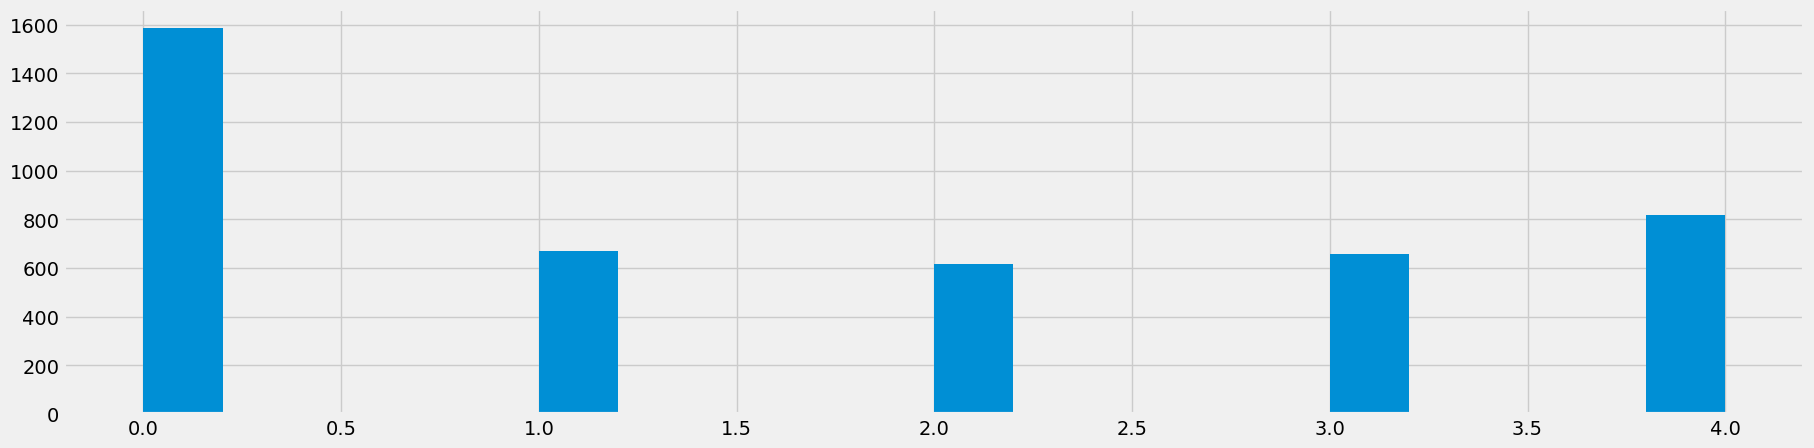

In [226]:
#histogram for Location
n_bins = 20
plt.figure(figsize = (20,5))
df["Location"].hist(bins = n_bins);


In [227]:
df.fillna(0, inplace=True)


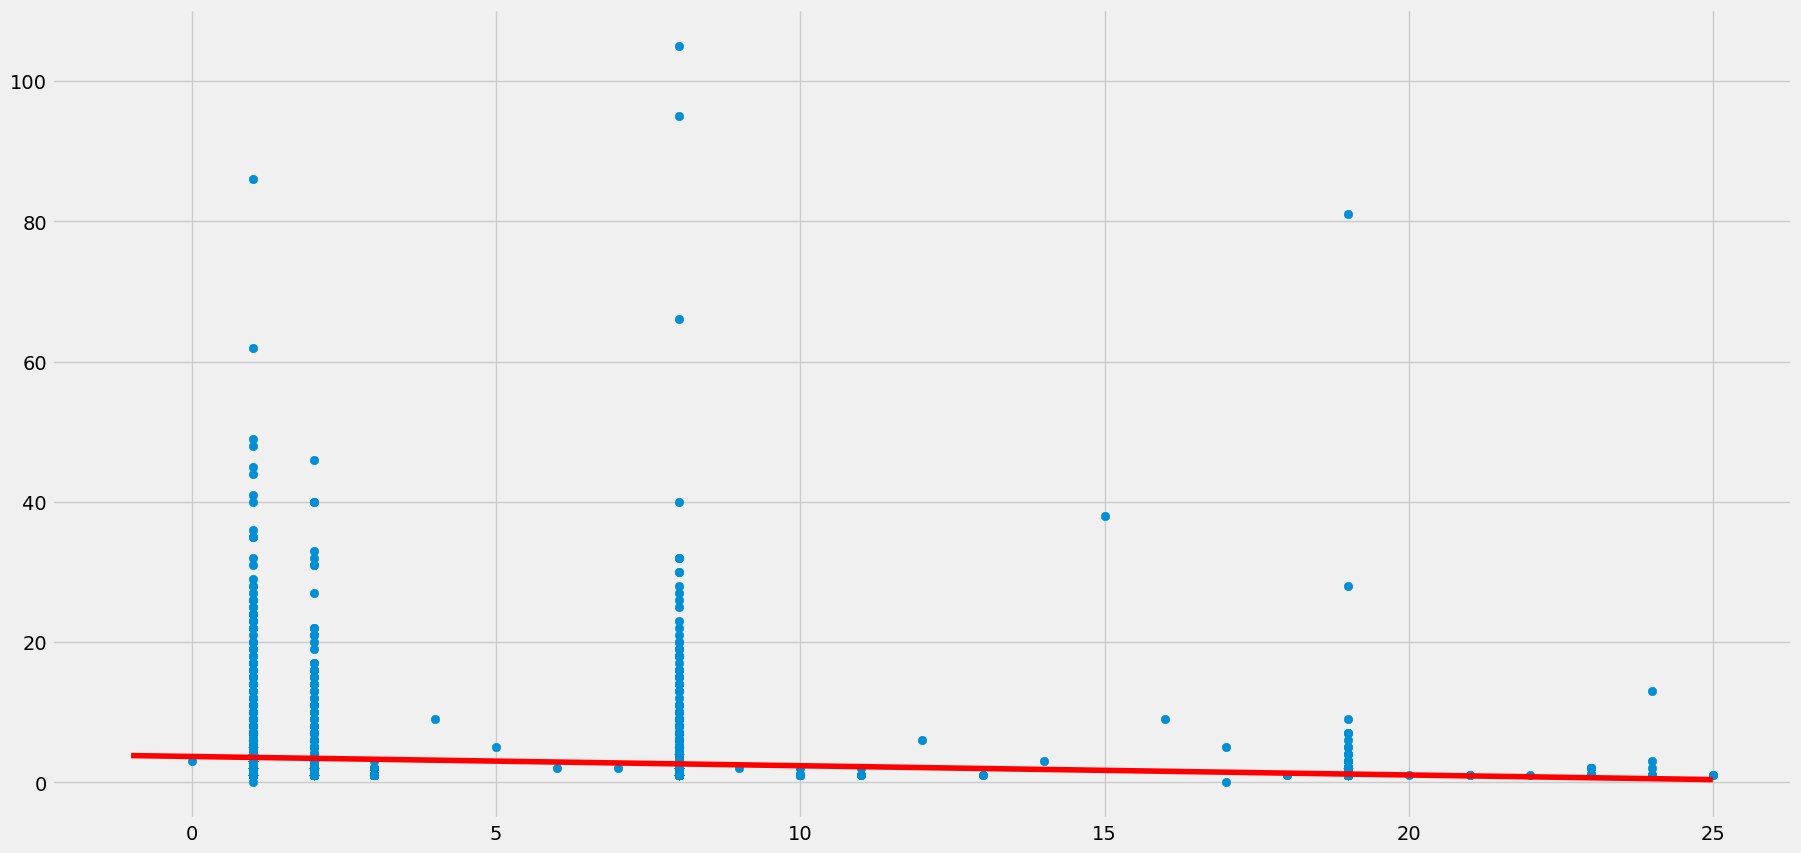

In [228]:
# The regression line predicts future reported salaries for the different Job titlesavailable

X = df['Job Title'].values.reshape(-1, 1)
y = df['Salaries Reported'].values.reshape(-1, 1)
regressor = LinearRegression()
regressor.fit(X, y)
new_data = np.array([-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 25]).reshape(-1, 1)
predictions = regressor.predict(new_data)
plt.scatter(X, y)
plt.plot(new_data, predictions, color='red')
plt.show()

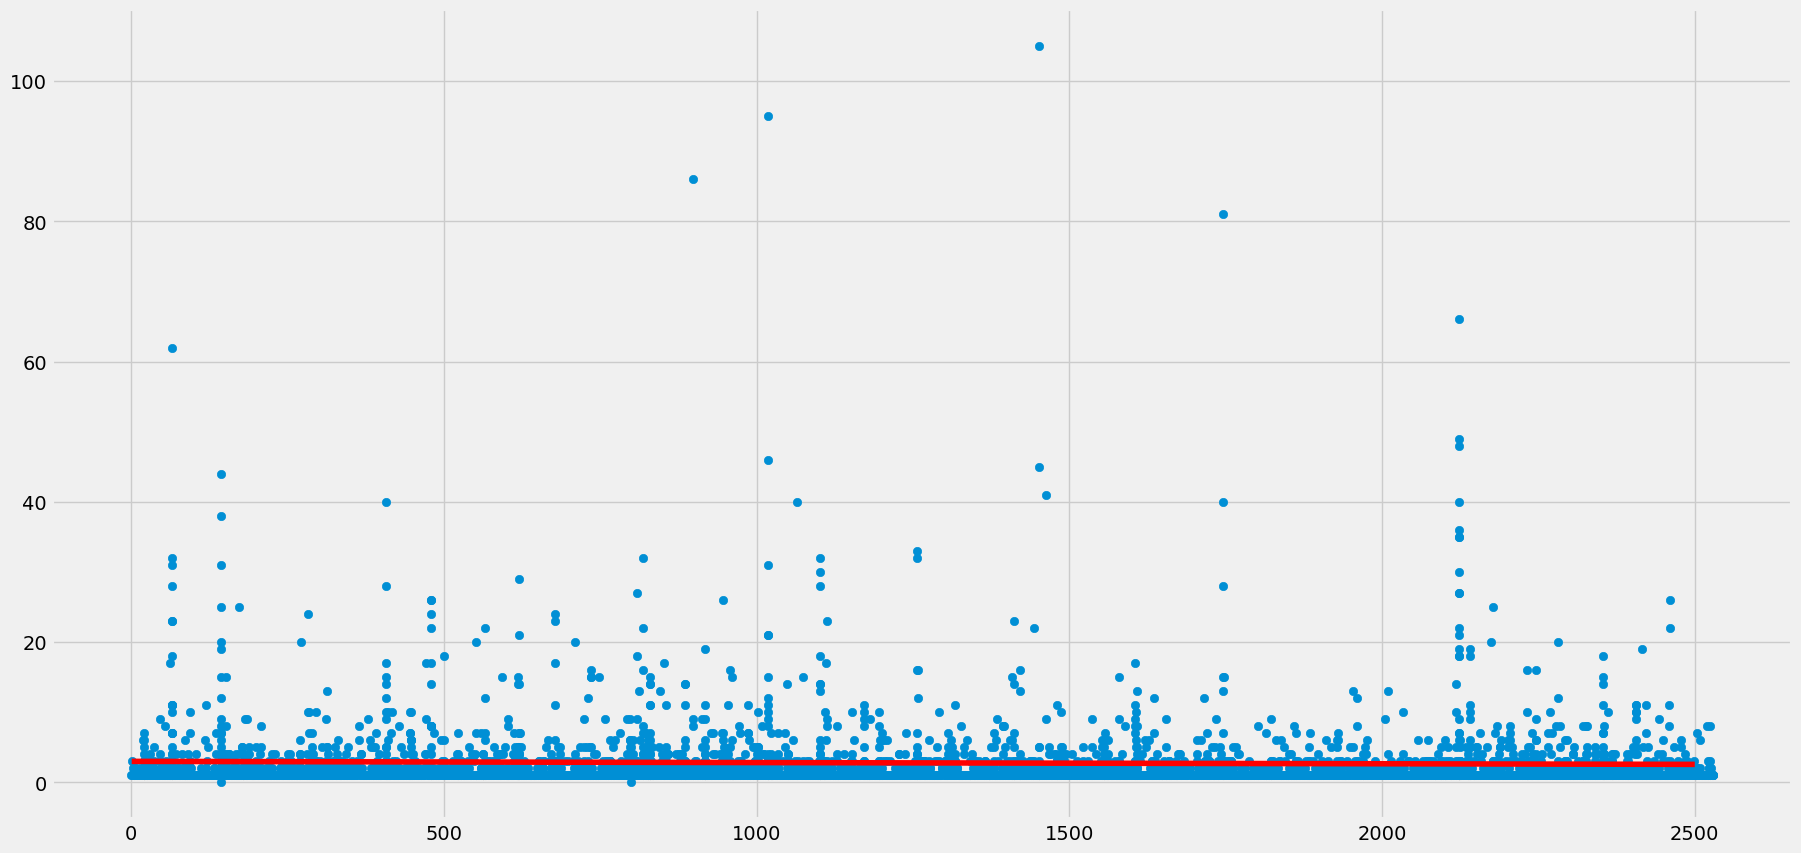

In [229]:
# The red line represents the regression line predicting future values for reported salaries for the different companies
X = df['Company Name'].values.reshape(-1, 1)
y = df['Salaries Reported'].values.reshape(-1, 1)
regressor = LinearRegression()
regressor.fit(X, y)
new_data = np.array([1, 2, 3, 4, 5, 2500]).reshape(-1, 1)
predictions = regressor.predict(new_data)
plt.scatter(X, y)
plt.plot(new_data, predictions, color='red')
plt.show()